In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU') 
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2.2.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)
print(housing.DESCR)


(20640, 8)
(20640,)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which

In [3]:
import pprint
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
# learning_rate
# W = W + grad * learning_rate
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    
    optimizer = keras.optimizers.SGD(lr)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = ["accuracy"])
    callbacks = [
            keras.callbacks.EarlyStopping(patience=3, min_delta=1e-3)
    ]
    history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid),
                       callbacks = callbacks)
    histories.append(history)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 5.2583 - accuracy: 0.0000e+00 - val_loss: 4.5536 - val_accuracy: 0.0000e+00
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 3.6942 - accuracy: 5.1680e-04 - val_loss: 3.3287 - val_accuracy: 7.7519e-04
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 2.7314 - accuracy: 0.0013 - val_loss: 2.5465 - val_accuracy: 7.7519e-04
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 2.1102 - accuracy: 0.0018 - val_loss: 2.0327 - val_accuracy: 0.0010
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 1.6975 - accuracy: 0.0020 - val_loss: 1.6862 - val_accuracy: 0.0016
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 1.4143 - accuracy: 0.0022 - val_loss: 1.4439 - val_accuracy: 0.0016
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 1.2177 - accuracy: 0.0025 - val_loss: 1.2732 - val_acc

Leraning rate: 0.0001


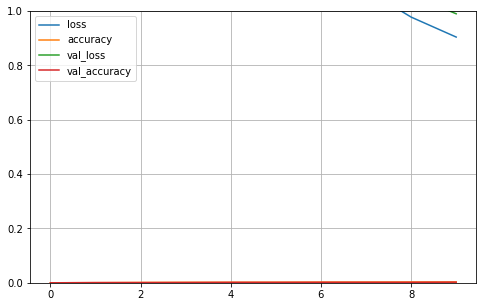

Leraning rate: 0.0003


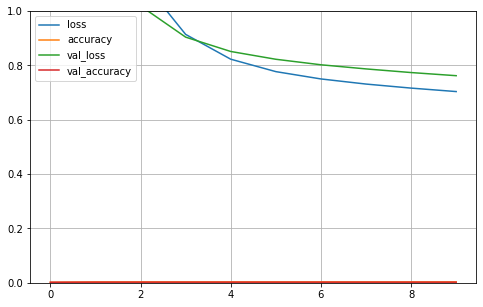

Leraning rate: 0.001


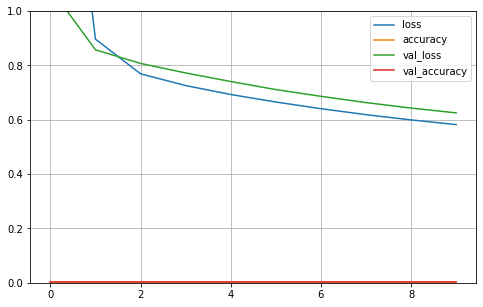

Leraning rate: 0.003


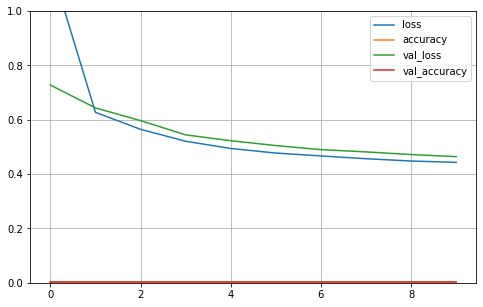

Leraning rate: 0.01


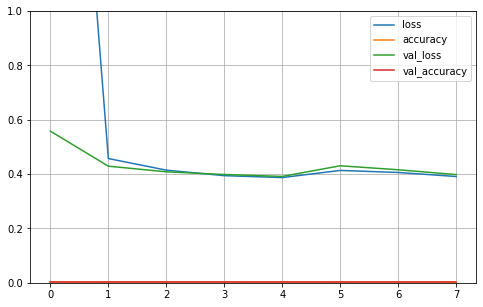

Leraning rate: 0.03


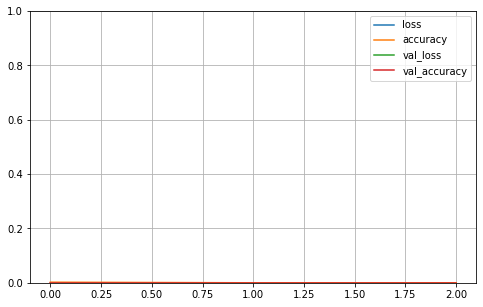

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr, history in zip(learning_rates, histories):
    print("Leraning rate:", lr)
    plot_learning_curves(history)